In [1]:
#import important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the data
data = pd.read_csv('cell_samples.csv')

In [4]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#check information of data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
#remove unnecessary columns
data.drop(['ID','BareNuc'], axis = 1)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1,2
695,2,1,1,1,2,1,1,1,2
696,5,10,10,3,7,8,10,2,4
697,4,8,6,4,3,10,6,1,4


In [8]:
data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [9]:
data.drop(['ID','BareNuc'], axis = 1, inplace = True)

In [10]:
data

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1,2
695,2,1,1,1,2,1,1,1,2
696,5,10,10,3,7,8,10,2,4
697,4,8,6,4,3,10,6,1,4


In [11]:
data.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [12]:
#split data in independent and dependent variable
X = data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BlandChrom', 'NormNucl', 'Mit']].values
y = data['Class'].values

In [13]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [15]:
#get the model 
from sklearn.svm import SVC

In [16]:
svc = SVC(kernel = 'linear')


In [17]:
#train the model 
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [18]:
#evaluation
y_pred = svc.predict(x_test)

In [19]:
#check the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9642857142857143

# {'linear', 'poly', 'rbf', 'sigmoid'}

In [20]:
svc2 = SVC(kernel = 'rbf')
svc2.fit(x_train,y_train)
y_pred2 = svc2.predict(x_test)
accuracy_score(y_pred2,y_test)

0.9714285714285714

In [21]:
svc3 = SVC(kernel = 'poly')
svc3.fit(x_train,y_train)
y_pred3 = svc3.predict(x_test)
accuracy_score(y_pred3,y_test)

0.9428571428571428

In [23]:
svc4 = SVC(kernel = 'sigmoid')
svc4.fit(x_train,y_train)
y_pred4 = svc4.predict(x_test)
accuracy_score(y_pred4,y_test)

0.45714285714285713

In [24]:
svc2 = SVC(kernel = 'rbf')
svc2.fit(x_train,y_train)
y_pred2 = svc2.predict(x_test)
accuracy_score(y_pred2,y_test)

0.9714285714285714

In [27]:
x_test

array([[4, 1, 1, ..., 2, 1, 1],
       [2, 3, 1, ..., 1, 1, 1],
       [5, 3, 1, ..., 2, 1, 1],
       ...,
       [5, 8, 7, ..., 5, 7, 1],
       [2, 1, 1, ..., 2, 1, 1],
       [1, 2, 3, ..., 1, 1, 1]], dtype=int64)

In [34]:
set(y)

{2, 4}

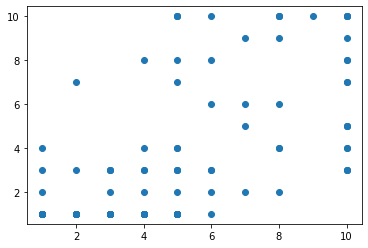

In [30]:
#plotting a graph 
plt.scatter(x_test[:,0],x_test[:,1])

In [37]:
colourset = np.array([' ',' ','red',' ','black'])

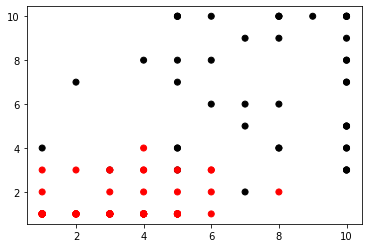

In [38]:
#plotting a graph and colour based on actual values
plt.scatter(x_test[:,0],x_test[:,1] , c = colourset[y_test])

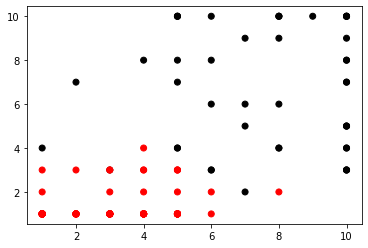

In [40]:
#plotting a graph and colour based on actual values
plt.scatter(x_test[:,0],x_test[:,1] , c = colourset[y_pred2])

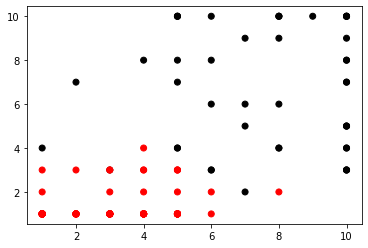

In [39]:
#plotting a graph and colour based on actual values
plt.scatter(x_test[:,0],x_test[:,1] , c = colourset[y_pred2])